<a href="https://colab.research.google.com/github/SebastienBienfait/L2C-Data-managment/blob/main/Data_Exploration_use_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing:

In [403]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('mode.chained_assignment',None)


url="https://raw.githubusercontent.com/SebastienBienfait/L2C-Data-managment/main/Datasets/kmfm_songs_2022-04-22.csv"

read = lambda x: pd.read_csv(x)
##Month: April
df_song_21 = read("https://raw.githubusercontent.com/SebastienBienfait/L2C-Data-managment/main/Datasets/kmfm_songs_2022-04-21.csv") #thur
df_song_22 = read("https://raw.githubusercontent.com/SebastienBienfait/L2C-Data-managment/main/Datasets/kmfm_songs_2022-04-22.csv") #fri
df_song_23 = read("https://raw.githubusercontent.com/SebastienBienfait/L2C-Data-managment/main/Datasets/kmfm_songs_2022-04-23.csv") #sat
df_song_24 = read("https://raw.githubusercontent.com/SebastienBienfait/L2C-Data-managment/main/Datasets/kmfm_songs_2022-04-24.csv") #sun
df_song_25 = read("https://raw.githubusercontent.com/SebastienBienfait/L2C-Data-managment/main/Datasets/kmfm_songs_2022-04-25.csv") #mon
df_song_26 = read("https://raw.githubusercontent.com/SebastienBienfait/L2C-Data-managment/main/Datasets/kmfm_songs_2022-04-26.csv") #tue
df_song_27 = read("https://raw.githubusercontent.com/SebastienBienfait/L2C-Data-managment/main/Datasets/kmfm_songs_2022-04-27.csv") #wed

display(df_song_21)

,Unnamed: 0,song_name,artist_name,song_genre,publish_year,time_played_at,dj_name
0,0,Black Magic,Little Mix,Pop,2015.0,04:00,NaN
1,1,Light Switch,Charlie Puth,Pop,2022.0,04:03,NaN
2,2,Finesse,"Bruno Mars, Cardi B",R&B/Soul,2018.0,04:10,NaN
3,3,Go,Cat Burns,Singer/Songwriter,2020.0,04:13,NaN
4,4,One Kiss,Calvin Harris / Dua Lipa,Dance,2018.0,04:16,NaN
...,...,...,...,...,...,...,...
244,244,Bam Bam,Camila Cabello / Ed Sheeran,Pop,2022.0,23:29,NaN
245,245,Stitches,Shawn Mendes,Pop,2015.0,23:33,NaN
246,246,Run,Becky Hill & Galantis,Dance,2022.0,23:43,NaN
247,247,Anywhere,Rita Ora,Pop,2017.0,23:46,NaN


Cleaning dataset:

In [404]:
def add_column_count(df):
  ones = np.zeros([len(df),1],dtype="int")
  ones.fill(1)
  df["count"] = ones
  return df

def add_hour(df):
  arr_temp = df["time_played_at"].str.split(":").str.get(0)
  df["time_played_at"] = arr_temp.to_numpy(dtype = "int8")
  df.rename(columns={"time_played_at":"hour"},inplace=True)
  return df

def add_DJs(df):
  if df["hour"] <= 6 or df["hour"] > 21 and pd.isnull(df["dj_name"]) == True:
    return "kmfm NonStop"
  elif df["hour"] == 10:
    return "Pop Anthems"
  elif df["hour"] == 13:
    return "Requests"
  else:
    return df["dj_name"]

def drop_column(df,column_name):
  if column_name in df.keys():
    df.drop(column_name,axis=1,inplace=True)
  return df
  
#split_ = lambda s: int(s.split(":")[0])
#df_combined["temp_column"] = df_combined["time_played_at"].apply(split_)
add_column_count(df_song_21)
add_column_count(df_song_22)
add_column_count(df_song_23)
add_column_count(df_song_24)
add_column_count(df_song_25)
add_column_count(df_song_26)
add_column_count(df_song_27)

add_hour(df_song_21)
add_hour(df_song_22)
add_hour(df_song_23)
add_hour(df_song_24)
add_hour(df_song_25)
add_hour(df_song_26)
add_hour(df_song_27)


df_song_21["dj_name"] = df_song_21.apply(add_DJs, axis = 1)
df_song_22["dj_name"] = df_song_22.apply(add_DJs, axis = 1)
df_song_23["dj_name"] = df_song_23.apply(add_DJs, axis = 1)
df_song_24["dj_name"] = df_song_24.apply(add_DJs, axis = 1)
df_song_25["dj_name"] = df_song_25.apply(add_DJs, axis = 1)
df_song_26["dj_name"] = df_song_26.apply(add_DJs, axis = 1)
df_song_27["dj_name"] = df_song_27.apply(add_DJs, axis = 1)


drop_column(df_song_21,"Unnamed: 0")
drop_column(df_song_22,"Unnamed: 0")
drop_column(df_song_23,"Unnamed: 0")
drop_column(df_song_24,"Unnamed: 0")
drop_column(df_song_25,"Unnamed: 0")
drop_column(df_song_26,"Unnamed: 0")
drop_column(df_song_27,"Unnamed: 0")

def comment_out2(): # to remove later
  drop_column(df_song_21,"hour")
  drop_column(df_song_22,"hour")
  drop_column(df_song_23,"hour")
  drop_column(df_song_24,"hour")
  drop_column(df_song_25,"hour")
  drop_column(df_song_26,"hour")
  drop_column(df_song_27,"hour")

Combining after cleaning:

In [405]:
df_combined = pd.concat([df_song_21, df_song_22, df_song_23, df_song_24, df_song_25, df_song_26, df_song_27], ignore_index=True)

#print(len(df_combined))
display(df_combined.info())
display(df_combined)
def test_null(df):
  display(df.info())

  for i in df.columns:
    if df[i].isnull().values.any() == True:
      print(i,"has",df[i].isnull().values.sum() ," null values")
  return df
test_null(df_combined)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1760 entries, 0 to 1759
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   song_name     1760 non-null   object 
 1   artist_name   1760 non-null   object 
 2   song_genre    1521 non-null   object 
 3   publish_year  1521 non-null   float64
 4   hour          1760 non-null   int8   
 5   dj_name       1722 non-null   object 
 6   count         1760 non-null   int64  
dtypes: float64(1), int64(1), int8(1), object(4)
memory usage: 84.3+ KB


None

,song_name,artist_name,song_genre,publish_year,hour,dj_name,count
0,Black Magic,Little Mix,Pop,2015.0,4,kmfm NonStop,1
1,Light Switch,Charlie Puth,Pop,2022.0,4,kmfm NonStop,1
2,Finesse,"Bruno Mars, Cardi B",R&B/Soul,2018.0,4,kmfm NonStop,1
3,Go,Cat Burns,Singer/Songwriter,2020.0,4,kmfm NonStop,1
4,One Kiss,Calvin Harris / Dua Lipa,Dance,2018.0,4,kmfm NonStop,1
...,...,...,...,...,...,...,...
1755,Time To Groove,Majestic / Nonô,Dance,2022.0,23,kmfm NonStop,1
1756,My Universe,Coldplay / Bts,Pop,2021.0,23,kmfm NonStop,1
1757,If You Really Love Me (How Will I Know),David Guetta / John Newman,Dance,2021.0,23,kmfm NonStop,1
1758,California Gurls,"Katy Perry, Snoop Dogg",Pop,2010.0,23,kmfm NonStop,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1760 entries, 0 to 1759
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   song_name     1760 non-null   object 
 1   artist_name   1760 non-null   object 
 2   song_genre    1521 non-null   object 
 3   publish_year  1521 non-null   float64
 4   hour          1760 non-null   int8   
 5   dj_name       1722 non-null   object 
 6   count         1760 non-null   int64  
dtypes: float64(1), int64(1), int8(1), object(4)
memory usage: 84.3+ KB


None

song_genre has 239  null values
publish_year has 239  null values
dj_name has 38  null values


,song_name,artist_name,song_genre,publish_year,hour,dj_name,count
0,Black Magic,Little Mix,Pop,2015.0,4,kmfm NonStop,1
1,Light Switch,Charlie Puth,Pop,2022.0,4,kmfm NonStop,1
2,Finesse,"Bruno Mars, Cardi B",R&B/Soul,2018.0,4,kmfm NonStop,1
3,Go,Cat Burns,Singer/Songwriter,2020.0,4,kmfm NonStop,1
4,One Kiss,Calvin Harris / Dua Lipa,Dance,2018.0,4,kmfm NonStop,1
...,...,...,...,...,...,...,...
1755,Time To Groove,Majestic / Nonô,Dance,2022.0,23,kmfm NonStop,1
1756,My Universe,Coldplay / Bts,Pop,2021.0,23,kmfm NonStop,1
1757,If You Really Love Me (How Will I Know),David Guetta / John Newman,Dance,2021.0,23,kmfm NonStop,1
1758,California Gurls,"Katy Perry, Snoop Dogg",Pop,2010.0,23,kmfm NonStop,1


For each song with multiple artists, separte rows are created for each artist indivually.

In [406]:

### possibly useless - move to testing
def count_artists(df):
  artist_list = df["artist_name"].to_list()
  print(artist_list)
  new_array = np.array([])
  for artist in artist_list:
    artist = artist.replace(", ", " / ")
    artist = artist.replace(" & ", " / ")
    artist = artist.split(" / ")
    for i in artist:
      np.append(new_array,i)
  print(new_array)
###

def duplicate_artist_rows(df):

  df_inclued_collab = pd.DataFrame([]) #return df

  for i in range(len(df)): #loops through the dataframe by row
    row = df.loc[i] # sets each row in turn as a series


    artist_name = row[1]                            ##
    artist_name = artist_name.replace(", ", " / ")  ## sets each seperator to " / "
    artist_name = artist_name.replace(" & ", " / ") ## then splits on " / " and returns an artist list
    artist_list = artist_name.split(" / ")          ##

    df_hold_dupe = pd.DataFrame([]) #temp df to hold rows as they are duplicated

    for artist in artist_list: # loops through each artist in artist_list
      row.update({"artist_name":artist}) # sets the index:"artist_name" of the row Series to each artist in turn
      df_store = pd.DataFrame([row])     
      df_hold_dupe = pd.concat([df_hold_dupe, df_store]) # appends each duplicated row to the temp df

    df_inclued_collab = pd.concat([df_inclued_collab, df_hold_dupe]) #appends the set of duplicated rows to the final df

  return df_inclued_collab


Currently useless funtion, might do something with this when i group data diffently.

In [407]:
def return_groups(df):
  duplicated_artist = duplicate_artist_rows(df)

  df_group_song = df.groupby("song_name").count() #["count"]
  df_group_artist = duplicated_artist.groupby("artist_name").count() #["count"]
  df_group_year = df.groupby("publish_year").count() #["count"]

  return df_group_song, df_group_artist, df_group_year

#df_combined_groupSong, df_combined_groupArtist, df_combined_groupYear = return_groups(df_combined)
df_21_groupSong, df_21_groupArtist, df_21_groupYear = return_groups(df_song_21)

artist_name
David Guetta          63
Jax Jones             63
Ed Sheeran            61
Becky Hill            57
Joel Corry            51
                      ..
David Morales          1
Puff Daddy             1
Pussycat Dolls         1
Daniel Bedingfield     1
Rembrandts             1
Name: count, Length: 434, dtype: int64

TO DO list:

* average repeats a day: song_total/song_unique
* most played song(s) and its artist(s)
* most played artist(s) and their top song(s)
* pie chart of genre per day
* average publish year per day
* bar chart/histogram of years

all of the above per DJ.

calculates the average ammout each on has been played per day:

In [408]:

def plural(length): #return based on multiple artists or not. I might clean this up later and move into individual funtions as the string logic is to specic.
  if length>1:
    return "s were ", "were"
  else:
    return " was ", "was"


def average_repeats(df):
  df_groupSong = df.groupby("song_name").count()
  total_unique_songs = len(df_groupSong.index)
  total_songs_played = df_groupSong["count"].sum()
  av_times_played = round(total_songs_played/total_unique_songs,2)

  print("each song has been played an average of \"",av_times_played,"\" times")




Most played artist:

In [409]:
def most_played_artist(df):
  df_all_artists = duplicate_artist_rows(df)

  df_group_artist = df_all_artists.groupby("artist_name").count()
  series_group_artist = df_group_artist["count"].sort_values(ascending = False)
  top10 = series_group_artist[0:10]
  #display(top10)

  max_played = series_group_artist.max()

  top_artist_list = list(df_group_artist[df_group_artist["count"] == max_played].index)

  test_plural = plural(len(top_artist_list))

  string = "The most played artist" + test_plural[0]

  for artist in top_artist_list:
    string += artist + " and "
  
  print(string + "had songs played ", top10.iloc[0], " times.")
                           

  #print("most common artist was \"",top_artist, "\" and was played \"",) #" by ",artist_name,


Most played song:

In [410]:
def most_played_song(df):
  df_groupby_song = df.groupby("song_name").count()
  series_group_song = df_groupby_song["count"].sort_values(ascending = False)
  top10 = series_group_song[0:10]
  #display(top10)

  max_played = series_group_song.max()

  top_song_list = list(df_groupby_song[df_groupby_song["count"] == max_played].index) #["song_name"]
  #top_songs = allow_for_multiple(top_song_list)
  
  artist_name_list = []
  for song in top_song_list:
    artist_name = df["artist_name"][df["song_name"]==song].iloc[0]
    artist_name_list.append(artist_name)

  both = list(zip(top_song_list,artist_name_list))

  test_plural = plural(len(both)) #returns the plural components of the string if more than one song was top

  string = "The most played song" + test_plural[0]

  for song, artist in both:
    string += song + " by " + artist + " and "

  print("\n", string,test_plural[1] + " played a total of ", top10.iloc[0], " times.") #

Bar chart of publication year:

In [411]:
#display(df_song_21.info())
def year_info(df,title):
  print("bar chart of year published for ",title)

  series_Year = df.groupby("publish_year").count()["count"]

  arr_year = df["publish_year"].dropna().to_numpy("int32")

  av_year = int(np.floor(arr_year.mean()))
  print("\n mean year: ",av_year)

  x = series_Year.index.to_numpy("int16")
  y = series_Year
  #boxplot:
  #plt.boxplot(arr_year)
  chart = plt.bar(x,y)
  #plt.xticks(x,rotation = 90)
  plt.title("bar chart of publication year vs frequency played")
  plt.xlabel("year of publication")
  plt.ylabel("frequency played")
  plt.show()
  return av_year, chart


Pie chart of genre:

pie chart of genre for  21st


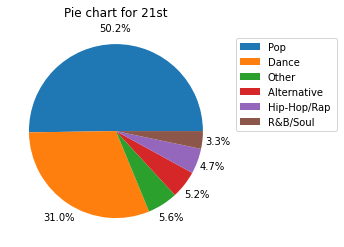

In [430]:
def genre_info(df,title):
  print("pie chart of genre for ", title)
  series_Genre = df.groupby("song_genre").count()["count"]
  
  sum = series_Genre.sum()

  other_count = 0
  for genre in series_Genre.index:
    total = series_Genre.loc[genre]
    if series_Genre.loc[genre] < np.floor(sum/40):
      series_Genre.drop(genre,inplace=True)
      other_count += total
  
  app_series = pd.Series({"Other":other_count})
  series_Genre = pd.concat([series_Genre,app_series])
  series_Genre = series_Genre.sort_values(ascending=False)

  labels = series_Genre.index

  chart = plt.pie(series_Genre, pctdistance=1.18, labeldistance = 1.2,autopct='%1.1f%%')
  plt.title("Pie chart for "+title)
  plt.legend(labels,loc=(1.05,0.5))
  plt.show()

  return chart
genre_info_21 = genre_info(df_song_21,"21st")

info breakdown per day of the week:

In [413]:
def comment_out3():
  print("\n overall")
  display_df_info(df_combined,"Combined")
  print("\n 21st")
  display_df_info(df_song_21,"21st")
  print("\n 22nd")
  display_df_info(df_song_22,"22nd")
  print("\n 23rd")
  display_df_info(df_song_23,"23rd")
  print("\n 24th")
  display_df_info(df_song_24,"24th")
  print("\n 25th")
  display_df_info(df_song_25,"25th")
  print("\n 26th")
  display_df_info(df_song_26,"26th")
  print("\n 27th")
  display_df_info(df_song_27,"27th")

Generating the DJ dataframes.

In [414]:
display(df_combined.info())
display(df_combined)
def display_df_info(df,title):
  average_repeats(df)
  most_played_song(df)
  most_played_artist(df)
  year_info(df,title)
  genre_info(df,title)

dj_list = df_combined["dj_name"].unique()
display(dj_list)

def df_by_DJ(df,dj):
  df_dj = df.drop(df[df["dj_name"] != dj].index)
  df_dj.reset_index(drop=True,inplace=True)
  return df_dj





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1760 entries, 0 to 1759
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   song_name     1760 non-null   object 
 1   artist_name   1760 non-null   object 
 2   song_genre    1521 non-null   object 
 3   publish_year  1521 non-null   float64
 4   hour          1760 non-null   int8   
 5   dj_name       1722 non-null   object 
 6   count         1760 non-null   int64  
dtypes: float64(1), int64(1), int8(1), object(4)
memory usage: 84.3+ KB


None

,song_name,artist_name,song_genre,publish_year,hour,dj_name,count
0,Black Magic,Little Mix,Pop,2015.0,4,kmfm NonStop,1
1,Light Switch,Charlie Puth,Pop,2022.0,4,kmfm NonStop,1
2,Finesse,"Bruno Mars, Cardi B",R&B/Soul,2018.0,4,kmfm NonStop,1
3,Go,Cat Burns,Singer/Songwriter,2020.0,4,kmfm NonStop,1
4,One Kiss,Calvin Harris / Dua Lipa,Dance,2018.0,4,kmfm NonStop,1
...,...,...,...,...,...,...,...
1755,Time To Groove,Majestic / Nonô,Dance,2022.0,23,kmfm NonStop,1
1756,My Universe,Coldplay / Bts,Pop,2021.0,23,kmfm NonStop,1
1757,If You Really Love Me (How Will I Know),David Guetta / John Newman,Dance,2021.0,23,kmfm NonStop,1
1758,California Gurls,"Katy Perry, Snoop Dogg",Pop,2010.0,23,kmfm NonStop,1


array(['kmfm NonStop', 'Garry and Claire', 'Pop Anthems', 'Andy Walker',
       'Requests', 'Rob Wills', 'Numi', 'Emma Adam', 'Jack Miles',
       'Garry Wilson', nan, 'Ben Pearce'], dtype=object)

,song_name,artist_name,song_genre,publish_year,hour,dj_name,count
0,Black Magic,Little Mix,Pop,2015.0,4,kmfm NonStop,1
1,Light Switch,Charlie Puth,Pop,2022.0,4,kmfm NonStop,1
2,Finesse,"Bruno Mars, Cardi B",R&B/Soul,2018.0,4,kmfm NonStop,1
3,Go,Cat Burns,Singer/Songwriter,2020.0,4,kmfm NonStop,1
4,One Kiss,Calvin Harris / Dua Lipa,Dance,2018.0,4,kmfm NonStop,1
...,...,...,...,...,...,...,...
433,Time To Groove,Majestic / Nonô,Dance,2022.0,23,kmfm NonStop,1
434,My Universe,Coldplay / Bts,Pop,2021.0,23,kmfm NonStop,1
435,If You Really Love Me (How Will I Know),David Guetta / John Newman,Dance,2021.0,23,kmfm NonStop,1
436,California Gurls,"Katy Perry, Snoop Dogg",Pop,2010.0,23,kmfm NonStop,1


each song has been played an average of " 1.96 " times

 The most played songs were Bam Bam by Camila Cabello / Ed Sheeran and Good Luck by Mabel & Jax Jones and she's all i wanna be by Tate Mcrae and  were played a total of  8  times.
The most played artist was Ed Sheeran and had songs played  16  times.
bar chart of year published for  Non Stop

 mean year:  2018


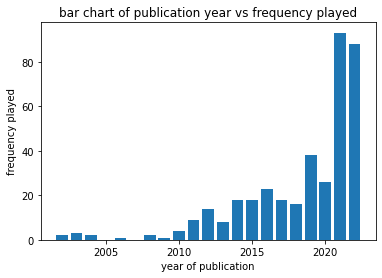

pie chart of genre for  Non Stop


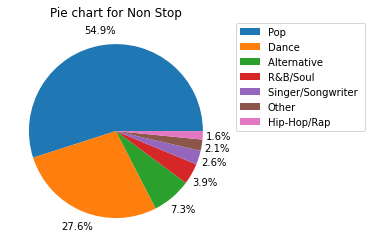

In [415]:
df_NonStop = df_by_DJ(df_combined,"kmfm NonStop")
display(df_NonStop)
df_NonStop_info = display_df_info(df_NonStop,"Non Stop")




,song_name,artist_name,song_genre,publish_year,hour,dj_name,count
0,In Da Club,50 Cent,NaN,NaN,10,Pop Anthems,1
1,Oops I Did It Again ...,Britney Spears,Pop,2004.0,10,Pop Anthems,1
2,Year Three Thousand,Busted,Rock,2002.0,10,Pop Anthems,1
3,Rock Dj,Robbie Williams,Pop,2010.0,10,Pop Anthems,1
4,Two Can Play That Game,Bobby Brown,R&B/Soul,1995.0,10,Pop Anthems,1
...,...,...,...,...,...,...,...
85,The Weekend,Michael Gray,NaN,NaN,10,Pop Anthems,1
86,Wannabe,Spice Girls,Pop,1996.0,10,Pop Anthems,1
87,Love In This Club,Usher / Young Jeezy,R&B/Soul,2008.0,10,Pop Anthems,1
88,Music,Madonna,Pop,2009.0,10,Pop Anthems,1


each song has been played an average of " 1.0 " times

 The most played songs were Acceptable In The Eighties by Calvin Harris and All Rise by Blue and Always Be My Baby by Mariah Carey and Another Chance by Roger Sanchez and Baby by Justin Bieber & Ludacris and Baby One More Time by Britney Spears and Beat Again by JLS and Better Off Alone by Alice Deejay / Dj Jurgen and Break Your Heart by Taio Cruz and Brimful Of Asha by Cornershop and Can't Get You Out Of My Head by Kylie Minogue and Cry Me A River by Justin Timberlake and Dilemma by Nelly/ Kelly Rowland and Dirrty by Christina Aguilera and Do Your Thing by Basement Jaxx and Don't Cha by Pussycat Dolls / Busta Rhymes and Don't Look Back In Anger by Oasis and Don't Stop The Music by Rihanna and Dynamite by Taio Cruz and Fantasy by Mariah Carey and Fight For This Love by Cheryl and Flowers by Sweet Female Attitude and Get Get Down by Paul Johnson and Give Me Everything by Pitbull / Ne-Yo / Afrojack / Nayer and Glad You Came by The Wa

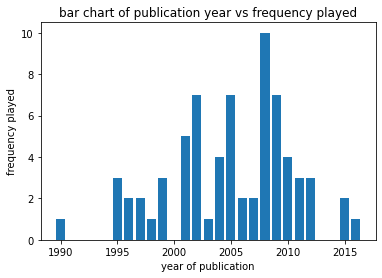

pie chart of genre for  Non Stop


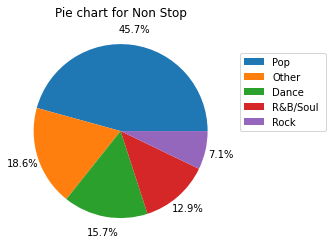

In [416]:
df_GandC = df_by_DJ(df_combined,"Pop Anthems")
display(df_GandC)
df_GandC_info = display_df_info(df_GandC,"Non Stop")

,song_name,artist_name,song_genre,publish_year,hour,dj_name,count
0,In Da Club,50 Cent,NaN,NaN,10,Pop Anthems,1
1,Oops I Did It Again ...,Britney Spears,Pop,2004.0,10,Pop Anthems,1
2,Year Three Thousand,Busted,Rock,2002.0,10,Pop Anthems,1
3,Rock Dj,Robbie Williams,Pop,2010.0,10,Pop Anthems,1
4,Two Can Play That Game,Bobby Brown,R&B/Soul,1995.0,10,Pop Anthems,1
...,...,...,...,...,...,...,...
85,The Weekend,Michael Gray,NaN,NaN,10,Pop Anthems,1
86,Wannabe,Spice Girls,Pop,1996.0,10,Pop Anthems,1
87,Love In This Club,Usher / Young Jeezy,R&B/Soul,2008.0,10,Pop Anthems,1
88,Music,Madonna,Pop,2009.0,10,Pop Anthems,1


each song has been played an average of " 1.0 " times

 The most played songs were Acceptable In The Eighties by Calvin Harris and All Rise by Blue and Always Be My Baby by Mariah Carey and Another Chance by Roger Sanchez and Baby by Justin Bieber & Ludacris and Baby One More Time by Britney Spears and Beat Again by JLS and Better Off Alone by Alice Deejay / Dj Jurgen and Break Your Heart by Taio Cruz and Brimful Of Asha by Cornershop and Can't Get You Out Of My Head by Kylie Minogue and Cry Me A River by Justin Timberlake and Dilemma by Nelly/ Kelly Rowland and Dirrty by Christina Aguilera and Do Your Thing by Basement Jaxx and Don't Cha by Pussycat Dolls / Busta Rhymes and Don't Look Back In Anger by Oasis and Don't Stop The Music by Rihanna and Dynamite by Taio Cruz and Fantasy by Mariah Carey and Fight For This Love by Cheryl and Flowers by Sweet Female Attitude and Get Get Down by Paul Johnson and Give Me Everything by Pitbull / Ne-Yo / Afrojack / Nayer and Glad You Came by The Wa

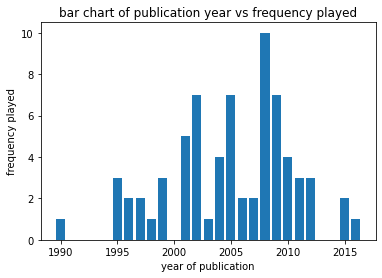

pie chart of genre for  Non Stop


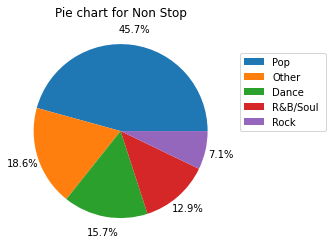

In [417]:
df_PopAnthems = df_by_DJ(df_combined,"Pop Anthems")
display(df_PopAnthems)
df_PopAnthems_info = display_df_info(df_PopAnthems,"Non Stop")

,song_name,artist_name,song_genre,publish_year,hour,dj_name,count
0,Heartbreak Anthem,"Galantis, Little Mix",Dance,2021.0,11,Andy Walker,1
1,House On Fire,Mimi Webb,Pop,2022.0,11,Andy Walker,1
2,So Sick,Jubel,Pop,2022.0,11,Andy Walker,1
3,Flowers,Nathan Dawe,Dance,2019.0,11,Andy Walker,1
4,Cold Heart (Pnau Remix),Elton John & Dua Lipa,Pop,2021.0,11,Andy Walker,1
...,...,...,...,...,...,...,...
294,Supalonely,Benee / Gus Dapperton,Alternative,2019.0,15,Andy Walker,1
295,Seventeen Going Under,Sam Fender,Singer/Songwriter,2021.0,15,Andy Walker,1
296,Looking For Me,Paul Woolford / Diplo / Kareen Lomax,Dance,2020.0,15,Andy Walker,1
297,Bam Bam,Camila Cabello / Ed Sheeran,Pop,2022.0,15,Andy Walker,1


each song has been played an average of " 1.75 " times

 The most played songs were Good Luck by Mabel & Jax Jones and Remind Me by Tom Grennan and What Would You Do? by Joel Corry, David Guetta & Bryson Tiller and  were played a total of  8  times.
The most played artist was David Guetta and had songs played  13  times.
bar chart of year published for  Non Stop

 mean year:  2019


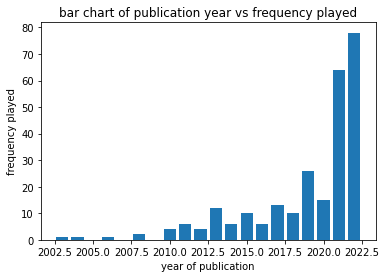

pie chart of genre for  Non Stop


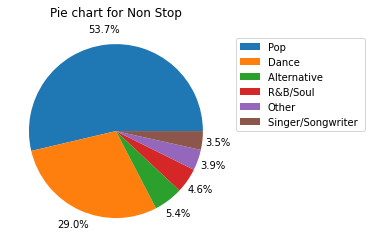

In [418]:
df_AndyWalker = df_by_DJ(df_combined,"Andy Walker")
display(df_AndyWalker)
df_AndyWalker_info = display_df_info(df_AndyWalker,"Non Stop")

,song_name,artist_name,song_genre,publish_year,hour,dj_name,count
0,Melody,Sigala,Dance,2022.0,13,Requests,1
1,Light Switch,Charlie Puth,Pop,2022.0,13,Requests,1
2,Let The Sun Shine,Labrinth,Pop,2010.0,13,Requests,1
3,Blinding Lights,The Weeknd,R&B/Soul,2019.0,13,Requests,1
4,The Sound,The 1975,Alternative,2016.0,13,Requests,1
...,...,...,...,...,...,...,...
83,Heroes,Alesso / Tove Lo,NaN,NaN,13,Requests,1
84,Anywhere Away From Here,Rag N Bone Man / Pink,Pop,2021.0,13,Requests,1
85,Time To Groove,Majestic / Nonô,Dance,2022.0,13,Requests,1
86,Let Me Love You,Ne-Yo,R&B/Soul,2012.0,13,Requests,1


each song has been played an average of " 1.11 " times

 The most played song was Stay by The Kid Laroi & Justin Bieber and  was played a total of  3  times.
The most played artist was Ed Sheeran and had songs played  4  times.
bar chart of year published for  Non Stop

 mean year:  2016


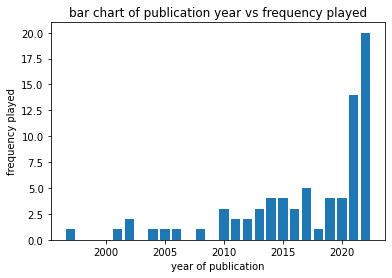

pie chart of genre for  Non Stop


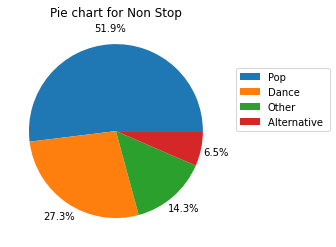

In [419]:
df_Requests = df_by_DJ(df_combined,"Requests")
display(df_Requests)
df_Requests_info = display_df_info(df_Requests,"Non Stop")

,song_name,artist_name,song_genre,publish_year,hour,dj_name,count
0,Beg For You,Charli Xcx / Rina Sawayama,Pop,2022.0,16,Rob Wills,1
1,Tell Me Something Good,Ewan Mcvicar,NaN,NaN,16,Rob Wills,1
2,Remind Me,Tom Grennan,Alternative,2022.0,16,Rob Wills,1
3,One Night,Griff,Pop,2021.0,16,Rob Wills,1
4,Problem,"Ariana Grande, Iggy Azalea",Pop,2014.0,16,Rob Wills,1
...,...,...,...,...,...,...,...
310,My Heart Goes (La Di Da),Becky Hill / Topic,Dance,2021.0,18,Rob Wills,1
311,More Than Friends,"James Hype, Kelli-Leigh",Dance,2017.0,18,Rob Wills,1
312,Montero (Call Me By Your Name),Lil Nas X,Pop,2021.0,18,Rob Wills,1
313,Shake It Off,Taylor Swift,Pop,2014.0,18,Rob Wills,1


each song has been played an average of " 1.56 " times

 The most played song was Where Did You Go? by Jax Jones, Mnek and  was played a total of  8  times.
The most played artist was David Guetta and had songs played  16  times.
bar chart of year published for  Non Stop

 mean year:  2018


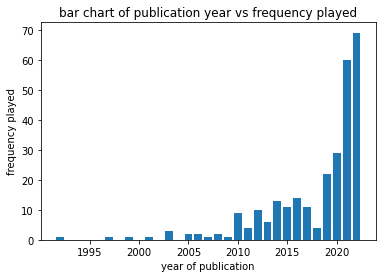

pie chart of genre for  Non Stop


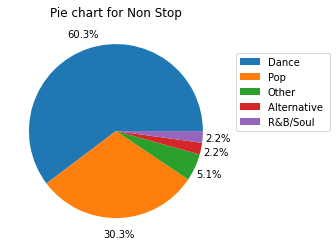

In [420]:
df_RobWills = df_by_DJ(df_combined,"Rob Wills")
display(df_RobWills)
df_RobWills_info = display_df_info(df_RobWills,"Non Stop")

,song_name,artist_name,song_genre,publish_year,hour,dj_name,count
0,Big Energy,Latto / Mariah Carey / Dj Khaled,Hip-Hop/Rap,2022.0,19,Numi,1
1,Better Days,Neiked / Mae Muller / Polo G,Pop,2021.0,19,Numi,1
2,Make Me Feel Good,Belters Only & Jazzy,Dance,2021.0,19,Numi,1
3,What Would You Do?,"Joel Corry, David Guetta & Bryson Tiller",Dance,2022.0,19,Numi,1
4,Dynamite,BTS,NaN,NaN,19,Numi,1
...,...,...,...,...,...,...,...
171,Run,Becky Hill & Galantis,Dance,2022.0,21,Numi,1
172,Heat Waves,Glass Animals,Pop,2020.0,21,Numi,1
173,Flowers,Lauren Spencer Smith,Pop,2022.0,21,Numi,1
174,What Would You Do?,"Joel Corry, David Guetta & Bryson Tiller",Dance,2022.0,21,Numi,1


each song has been played an average of " 1.93 " times

 The most played songs were Baby by Aitch & Ashanti and Big Energy by Latto / Mariah Carey / Dj Khaled and Freaky Deaky by Tyga, Doja Cat and  were played a total of  5  times.
The most played artist was Ed Sheeran and had songs played  7  times.
bar chart of year published for  Non Stop

 mean year:  2020


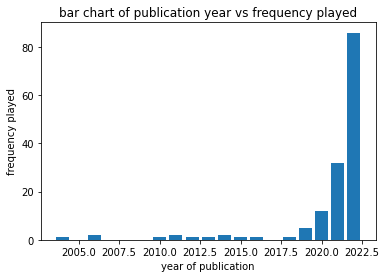

pie chart of genre for  Non Stop


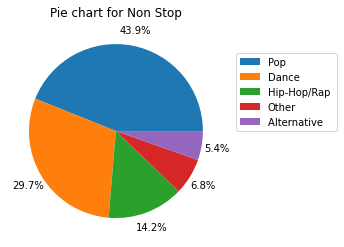

In [421]:
df_Numi = df_by_DJ(df_combined,"Numi")
display(df_Numi)
df_Numi_info = display_df_info(df_Numi,"Non Stop")

,song_name,artist_name,song_genre,publish_year,hour,dj_name,count
0,Don't Play,Anne Marie & Ksi & Digital Farm Animals,Pop,2021.0,11,Emma Adam,1
1,Run,Becky Hill & Galantis,Dance,2022.0,11,Emma Adam,1
2,Human,Rag 'n' Bone Man,Alternative,2017.0,11,Emma Adam,1
3,This Is Real,Jax Jones & Ella Henderson,Dance,2019.0,11,Emma Adam,1
4,Halo,Beyonce,Pop,2008.0,11,Emma Adam,1
5,Seventeen Going Under,Sam Fender,Singer/Songwriter,2021.0,11,Emma Adam,1
6,Light Switch,Charlie Puth,Pop,2022.0,11,Emma Adam,1
7,About Time,Lizzo,NaN,NaN,11,Emma Adam,1
8,Good Without,Mimi Webb,Pop,2021.0,11,Emma Adam,1
9,When The Bassline Drops,"Craig David, Big Narstie",NaN,NaN,11,Emma Adam,1


each song has been played an average of " 1.0 " times

 The most played songs were A Sky Full Of Stars by Coldplay and ABC by Gayle and About Time by Lizzo and Anyone For You by George Ezra and As It Was by Harry Styles and Bam Bam by Camila Cabello / Ed Sheeran and Before You Go by Lewis Capaldi and Cold Heart (Pnau Remix) by Elton John & Dua Lipa and Dance Monkey by Tones and I and Don't Play by Anne Marie & Ksi & Digital Farm Animals and Don't Start Now by Dua Lipa and Flowers by Nathan Dawe and Get Out My Head by Shane Codd and Good Luck by Mabel & Jax Jones and Good Without by Mimi Webb and Halo by Beyonce and Human by Rag 'n' Bone Man and If I Can't Have You by Shawn Mendes and Irreplaceable by Beyonce and Kiss My (Uh Oh) by Anne-Marie / Little Mix and Light Switch by Charlie Puth and Looking For Me by Paul Woolford / Diplo / Kareen Lomax and Midnight Sky by Miley Cyrus and Remind Me by Tom Grennan and Run by Becky Hill & Galantis and Seventeen Going Under by Sam Fender and Sorry

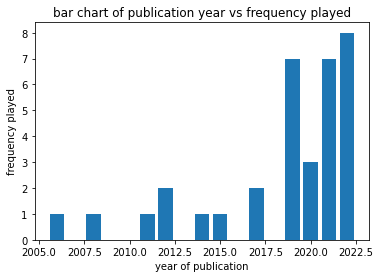

pie chart of genre for  Non Stop


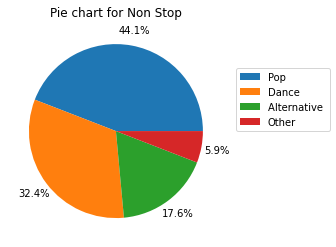

In [422]:
df_EmmaAdam = df_by_DJ(df_combined,"Emma Adam")
display(df_EmmaAdam)
df_EmmaAdam_info = display_df_info(df_EmmaAdam,"Non Stop")

,song_name,artist_name,song_genre,publish_year,hour,dj_name,count
0,Want To Want Me,Jason Derulo,Pop,2015.0,15,Jack Miles,1
1,Run,Becky Hill & Galantis,Dance,2022.0,15,Jack Miles,1
2,Juice,Lizzo,Pop,2019.0,15,Jack Miles,1
3,Breaking Me,"Topic, A7S",Dance,2019.0,15,Jack Miles,1
4,These Days,Rudimental / Jess Glynne / Macklemore / Dan Ca...,Dance,2018.0,15,Jack Miles,1
...,...,...,...,...,...,...,...
86,We Are Never Ever Getting Back Together,Taylor Swift,NaN,NaN,15,Jack Miles,1
87,Piece Of Your Heart,Meduza / Goodboys,Dance,2019.0,15,Jack Miles,1
88,Where Did You Go?,"Jax Jones, Mnek",Dance,2022.0,15,Jack Miles,1
89,Here With Me,Marshmello / Chvrches,Dance,2019.0,15,Jack Miles,1


each song has been played an average of " 1.15 " times

 The most played songs were ABC by Gayle and Anyone For You by George Ezra and Bam Bam by Camila Cabello / Ed Sheeran and Blinding Lights by The Weeknd and Closer by Ne-Yo and Cold Heart (Pnau Remix) by Elton John & Dua Lipa and Good 4 U by Olivia Rodrigo and House On Fire by Mimi Webb and Light Switch by Charlie Puth and Run by Becky Hill & Galantis and Where Did You Go? by Jax Jones, Mnek and she's all i wanna be by Tate Mcrae and  were played a total of  2  times.
The most played artists were Ed Sheeran and Little Mix and had songs played  4  times.
bar chart of year published for  Non Stop

 mean year:  2018


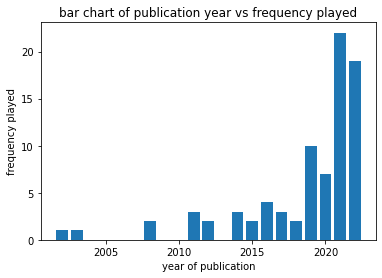

pie chart of genre for  Non Stop


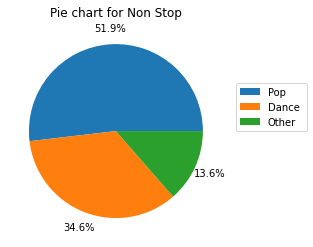

In [423]:
df_JackMiles = df_by_DJ(df_combined,"Jack Miles")
display(df_JackMiles)
df_JackMiles_info = display_df_info(df_JackMiles,"Non Stop")

,song_name,artist_name,song_genre,publish_year,hour,dj_name,count
0,Get Out My Head,Shane Codd,Dance,2020.0,7,Garry Wilson,1
1,Can't Stop The Feeling,Justin Timberlake,Pop,2016.0,7,Garry Wilson,1
2,she's all i wanna be,Tate Mcrae,Pop,2022.0,7,Garry Wilson,1
3,Bad Habits,Ed Sheeran,Pop,2021.0,7,Garry Wilson,1
4,Havana,Camila Cabello,NaN,NaN,7,Garry Wilson,1
5,Piece Of Your Heart,Meduza / Goodboys,Dance,2019.0,7,Garry Wilson,1
6,House On Fire,Mimi Webb,Pop,2022.0,7,Garry Wilson,1
7,Feel It Still,"Portugal, The Man",Alternative,2017.0,7,Garry Wilson,1
8,Umbrella,Rihanna,R&B/Soul,2008.0,7,Garry Wilson,1
9,ABC,Gayle,Pop,2021.0,7,Garry Wilson,1


each song has been played an average of " 1.0 " times

 The most played songs were 24K Magic by Bruno Mars and ABC by Gayle and About Time by Lizzo and Adore You by Harry Styles and Anyone For You by George Ezra and Anywhere by Rita Ora and As It Was by Harry Styles and Bad Habits by Ed Sheeran and Bam Bam by Camila Cabello / Ed Sheeran and Bed by Joel Corry / Raye / David Guetta and Body by Loud Luxury, Brando and Can't Stop The Feeling by Justin Timberlake and Dancing Feet by Kygo / Dnce and Don't Feel Like Crying by Sigrid and Don't Play by Anne Marie & Ksi & Digital Farm Animals and Feel It Still by Portugal, The Man and Get Out My Head by Shane Codd and Good Luck by Mabel & Jax Jones and Havana by Camila Cabello and House On Fire by Mimi Webb and Light Switch by Charlie Puth and Mad Love by Mabel and Midnight Sky by Miley Cyrus and Moves Like Jagger by Maroon 5 / Christina Aguilera and My Heart Goes (La Di Da) by Becky Hill / Topic and One Last Time by Ariana Grande and One Too Ma

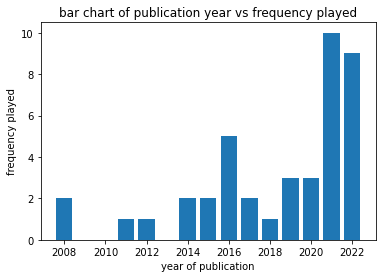

pie chart of genre for  Non Stop


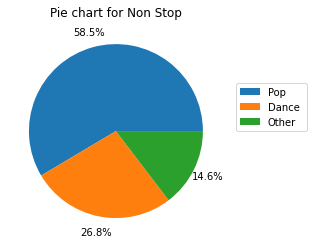

In [424]:
df_GarryWilson = df_by_DJ(df_combined,"Garry Wilson")
display(df_GarryWilson)
df_GarryWilson_info = display_df_info(df_GarryWilson,"Non Stop")

,song_name,artist_name,song_genre,publish_year,hour,dj_name,count
0,The Girls,Calvin Harris,Dance,2007.0,19,Ben Pearce,1
1,Scandalous,Misteeq,NaN,NaN,19,Ben Pearce,1
2,Fantasy,Mariah Carey,Pop,1995.0,19,Ben Pearce,1
3,Telephone,Lady Gaga & Beyonce,Pop,2010.0,19,Ben Pearce,1
4,No Letting Go,Wayne Wonder,NaN,NaN,19,Ben Pearce,1
5,What Makes You Beautiful,One Direction,Pop,2011.0,19,Ben Pearce,1
6,There You Go,Pink,Pop,2010.0,19,Ben Pearce,1
7,Teenage Dirtbag,Wheatus,Rock,2013.0,19,Ben Pearce,1
8,Gotta Get Thru This,Daniel Bedingfield,Rock,2002.0,19,Ben Pearce,1
9,"Love, Sex, Magic",Ciara & Justin Timberlake,R&B/Soul,2009.0,19,Ben Pearce,1


each song has been played an average of " 1.0 " times

 The most played songs were Best Thing I Never Had by Beyonce and Boogie Tonight by Booty Luv and Cry For You (You'll Never See Me Again) by September and Dj Got Us Falling In Love by Usher / Pitbull and Fantasy by Mariah Carey and Fascination by Alphabeat and Freak Me by Another Level and Freed From Desire by Gala and Get The Party Started by Pink and Gotta Get Thru This by Daniel Bedingfield and Hole In The Head by Sugababes and I Kissed A Girl by Katy Perry and I'll Be Missing You by Puff Daddy & Faith Evans and It Wasn't Me by Shaggy, Rikrok and Love, Sex, Magic by Ciara & Justin Timberlake and Mmm Bop by Hanson and Music by Madonna and No Letting Go by Wayne Wonder and Put 'em High by Stonebridge / Therese and Rapture by Iio and Sambuca by Wideboys / Dennis G and Say You'll Be There by Spice Girls and Scandalous by Misteeq and Spinning Around by Kylie Minogue and Take A Bow by Rihanna and Teenage Dirtbag by Wheatus and Telepho

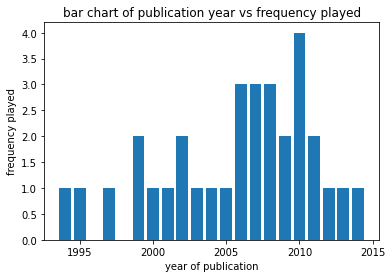

pie chart of genre for  Non Stop


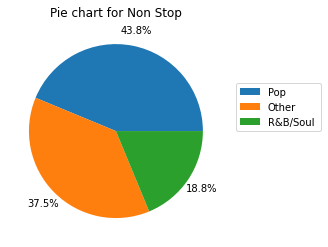

In [425]:
df_BenPearce = df_by_DJ(df_combined,"Ben Pearce")
display(df_BenPearce)
df_BenPearce_info = display_df_info(df_BenPearce,"Non Stop")

each song has been played an average of " 3.22 " times

 The most played song was Where Did You Go? by Jax Jones, Mnek and  was played a total of  32  times.
The most played artists were David Guetta and Jax Jones and had songs played  63  times.
bar chart of year published for  All

 mean year:  2017


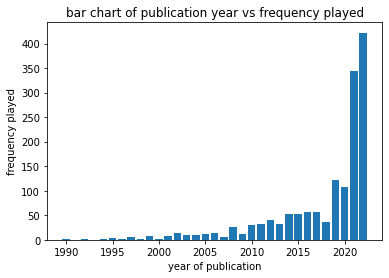

pie chart of genre for  All


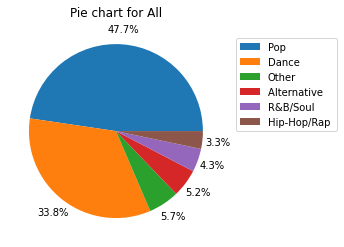

In [431]:
display_df_info(df_combined,"All")

Testing area:

In [426]:
df_test = pd.DataFrame([[1,2],[2,4],[3,9],[4,16]], columns=["num","square"],index=[1,2,3,4])
row_add = pd.Series([5,25], index=["num","square"])  #,columns=df_test.keys())
df_add = pd.DataFrame([[5,25],[4,16]],columns=["num","square"],index=[5,4])

display(df_test,row_add,df_add)
#df_test = pd.concat([df_test,df_add],axis =0,join="inner",ignore_index=False) #, index = 1
#df_test.concat([df_add],axis =0,join="inner",ignore_index=False)

df_attempt = pd.concat([df_test,row_add.T],axis = 1,ignore_index=False)

display(df_attempt)
list1 = [1,2,3,4,5,6]
list2 = [6,5,4,3,2,1]
#print(df_group_song.size)
"""
counting = df_test.index.value_counts()[2]
test_drop = df_test.drop(4)
display(test_drop)

if 100 not in set_year:
  print("yes")
else:
  print("no")
"""

,num,square
1,1,2
2,2,4
3,3,9
4,4,16


num        5
square    25
dtype: int64

,num,square
5,5,25
4,4,16


,num,square,0
1,1.0,2.0,NaN
2,2.0,4.0,NaN
3,3.0,9.0,NaN
4,4.0,16.0,NaN
num,NaN,NaN,5.0
square,NaN,NaN,25.0


'\ncounting = df_test.index.value_counts()[2]\ntest_drop = df_test.drop(4)\ndisplay(test_drop)\n\nif 100 not in set_year:\n  print("yes")\nelse:\n  print("no")\n'

* Songs played more than 4 times a day,
* average repeated songs played per day
* pie chart by genre, per day and overall
* inclue date played in the df
* most played song, most played artist ect.
* possibly get song time info to add
* average song age (int(year))
* songs per dj?
* get better dj info -lots of string stuff. Machine learning?






Dustbin:

In [427]:
#### Attempting to update one column based on the condition of another
"""
def add_djs(df):
  split_ = lambda s: int(s.split(":")[0]) #splitting 14:12 ect...
  #if split = None:
  df["temp_column"] = df["time_played_at"].apply(split_)
  display(df.loc[df['time_played_at'].apply(split_)<6,"dj_name"])
  df.loc[df['time_played_at'].apply(split_) < 6 , 'dj_name'] = "kmfm NonStop" #
  #df.loc[df['time_played_at'].apply(split_) > 21 and 'dj_name' == float("nan"), 'dj_name'] = "kmfm NonStop"

  df.loc[df['time_played_at'].apply(split_) == 10, 'dj_name'] = "Pop Anthems"

  df.loc[df['time_played_at'].apply(split_) == 13 , 'dj_name'] = "Requests"
"""


####
#All this was pointless, you cannont have both int and float in a single pd/np array
####
#formatNumber = lambda x: x if x%1 else int(x)
#df_combined["publish_year"] = df_combined["publish_year"].apply(formatNumber)
#display(df_combined.info())
####


####Possibly useless im not sure.
"""
def change_name(name):
  other_count = 0
  if df_group_song.loc[name, "count"] > 1:
    return name
  else:
    other_count += 1
    return "other" #df_group_song.drop(df_group_song.loc[name])


#df_group_song["updated_name"] = df_group_song.index.map(change_name)
#display(df_group_song)


def other_find(df):
  df.index = df.index.map(change_name)
  other_count = df.index.value_counts()["other"]
  df.drop("other", inplace = True)

  df_temp = pd.DataFrame([[other_count]],index=["other"],columns=["count"])
  #df = pd.concat([df,df_temp],ignore_index=False)
  return df
  """
########
#Testing for the duplication of rows based on the artists of a song
########

"""
def duplicate_rows(input):

  artist_name = input[1]
  artist_name = artist_name.replace(", ", " / ")
  artist_name = artist_name.replace(" & ", " / ")

  artist_list = artist_name.split(" / ")

  df_hold_dupe = pd.DataFrame([])

  for artist in artist_list:
    input.update({"artist_name":artist}) # pd.Series([artist]), index=["artist_name"]
    df_store = pd.DataFrame([input])
    df_hold_dupe = pd.concat([df_hold_dupe, df_store])

  return df_hold_dupe


def copy(df):
  copy_called = "I called copy"

  df_inclued_collab = pd.DataFrame([])
  
  for i in [0,2,4,1759]: #len(df) #range(4)

    row = df.loc[i]


    df_artist_dupes = duplicate_rows(row)
    df_inclued_collab = pd.concat([df_inclued_collab, df_artist_dupes], ignore_index=False) #
  return df_inclued_collab

artist1 = df_combined.iloc[0]
artist2, artist1_index = df_combined.iloc[2], df_combined.index[4]
artist3, artist2_index = df_combined.iloc[4], df_combined.index[2]
artist4, artist3_index = df_combined.iloc[1759], df_combined.index[1759]

#artist21 = 

artist1_ = artist1[1]
artist2_ = artist2[1]
artist3_ = artist3[1]
artist4_ = artist4[1]

df1 = pd.DataFrame([artist1])
df2 = pd.DataFrame([artist2])
df3 = pd.DataFrame([artist3])
df4 = pd.DataFrame([artist4])


#df1.to_csv("testing_dataframe.csv")

print(list(artist1_))
print(list(artist2_))
print(list(artist3_))


df1 = pd.concat([df1,df2,df3,df4])
display(df1)

#df1 = duplicate_artist_rows(df1)
#display(df1)#duplicate_rows(artist1))
#df1 = df1.apply(duplicate_rows,axis=1)
#print(type(df1))
"""

'\ndef duplicate_rows(input):\n\n  artist_name = input[1]\n  artist_name = artist_name.replace(", ", " / ")\n  artist_name = artist_name.replace(" & ", " / ")\n\n  artist_list = artist_name.split(" / ")\n\n  df_hold_dupe = pd.DataFrame([])\n\n  for artist in artist_list:\n    input.update({"artist_name":artist}) # pd.Series([artist]), index=["artist_name"]\n    df_store = pd.DataFrame([input])\n    df_hold_dupe = pd.concat([df_hold_dupe, df_store])\n\n  return df_hold_dupe\n\n\ndef copy(df):\n  copy_called = "I called copy"\n\n  df_inclued_collab = pd.DataFrame([])\n  \n  for i in [0,2,4,1759]: #len(df) #range(4)\n\n    row = df.loc[i]\n\n\n    df_artist_dupes = duplicate_rows(row)\n    df_inclued_collab = pd.concat([df_inclued_collab, df_artist_dupes], ignore_index=False) #\n  return df_inclued_collab\n\nartist1 = df_combined.iloc[0]\nartist2, artist1_index = df_combined.iloc[2], df_combined.index[4]\nartist3, artist2_index = df_combined.iloc[4], df_combined.index[2]\nartist4, artist3